# **Machine Learning Algorithms - Final Test - Feature Selection & Hyperparameter Tuning**

## **Uploading the dataset**
---

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None) # display all columns

premier_df = pd.read_csv('C:/Users/Christos/Desktop/Project/Dataset/final_premier_league_dataset.csv')

print("Dataset Dimensions:", premier_df.shape , "\n")

Dataset Dimensions: (3500, 148) 



In [2]:
premier_df.head()

,match_id,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,goal_home_ft,goal_away_ft,sg_match_ft,goal_home_ht,goal_away_ht,sg_match_ht,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_att_rating,home_mid_rating,home_def_rating,home_ovr_rating,away_att_rating,away_mid_rating,away_def_rating,away_ovr_rating,home_win_streak,home_draw_streak,home_lose_streak,away_win_streak,away_draw_streak,away_lose_streak,home_points_acum,away_points_acum,home_team_total_points_acum,away_team_total_points_acum,point_difference,home_goals_acum,home_goals_against_acum,away_goals_acum,away_goals_against_acum,home_team_total_goals_acum,away_team_total_goals_acum,goal_difference,home_team_total_goals_against_acum,away_team_total_goals_against_acum,goal_against_difference,home_team_form_last_3,away_team_form_last_3,home_team_form_last_6,away_team_form_last_6,game_result
0,31,https://www.premierleague.com/match/7117,10/11,2010-09-11,Arsenal,Bolton Wanderers,4-1,1-1,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,4.0,1.0,3.0,1.0,1.0,0.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.0,0.0,6.0,3.0,0.0,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,84,84,80,81,74,75,75,76,1,0,0,1,0,0,3,3,7,5,-2,6,0,3,1,9,5,-4,2,3,1,6.4,4.0,7.4,5.0,H
1,32,https://www.premierleague.com/match/7118,10/11,2010-09-11,Everton,Manchester United,3-3,1-1,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,3.0,3.0,0.0,1.0,1.0,0.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,80,79,78,78,85,82,82,82,0,1,0,0,1,0,1,1,1,7,6,1,1,2,2,1,8,7,3,2,-1,0.8,5.

In [3]:
print("Types of dataset features:")
premier_df.dtypes.value_counts()

Types of dataset features:


float64    110
int64       30
object       8
dtype: int64

## **Removing unnecessary features**
---

In [4]:
# features that indicate the winner of each row
premier_df.drop(['match_id', 'link_match', 'home_team', 'away_team', 'date', 'result_full', 'result_ht', 'goal_home_ft',
                 'goal_away_ft', 'goal_home_ht', 'goal_away_ht', 'sg_match_ft', 'sg_match_ht'], axis=1, inplace=True)

premier_df.head()

,season,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_att_rating,home_mid_rating,home_def_rating,home_ovr_rating,away_att_rating,away_mid_rating,away_def_rating,away_ovr_rating,home_win_streak,home_draw_streak,home_lose_streak,away_win_streak,away_draw_streak,away_lose_streak,home_points_acum,away_points_acum,home_team_total_points_acum,away_team_total_points_acum,point_difference,home_goals_acum,home_goals_against_acum,away_goals_acum,away_goals_against_acum,home_team_total_goals_acum,away_team_total_goals_acum,goal_difference,home_team_total_goals_against_acum,away_team_total_goals_against_acum,goal_against_difference,home_team_form_last_3,away_team_form_last_3,home_team_form_last_6,away_team_form_last_6,game_result
0,10/11,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.0,0.0,6.0,3.0,0.0,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,84,84,80,81,74,75,75,76,1,0,0,1,0,0,3,3,7,5,-2,6,0,3,1,9,5,-4,2,3,1,6.4,4.0,7.4,5.0,H
1,10/11,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,80,79,78,78,85,82,82,82,0,1,0,0,1,0,1,1,1,7,6,1,1,2,2,1,8,7,3,2,-1,0.8,5.6,1.0,7.0,D
2,10/11,43.0,6.0,9.0,6.0,570.0,61.3,0.0,17.0,3.0,17.0,780.0,3.0,51.0,6.0,19.0,2.0,348.0,38.7,1.0,7.0,2.0,17.0,561.0,5.0,38.0,5.0,10.0,0.0,410.0,42.8,0.0,20.0,8.0,14.0,629.0,2.0,2.0,2.0,0.0,0.0,1.0,-1.0,33.3,39.0,3.0,16.0,0.0,298.0,40.7,0.0,10.0,2.0,20.0,471.0,2.0,1.0,1.0,0.0,0.0,1.0,-1.0,33.3,46.7,6.0,13.3,3.3,402.0,47.4,0.0,16.0,5.7,16.3,631.3,1.7,1.33,

## **Identify NaN values & replace them with the mean of each column**
---

In [5]:
count = 0
for column in premier_df.isna().sum():
    count += column

print(count, "NaN values exist within the dataset.")

76 NaN values exist within the dataset.


In [6]:
column_means = premier_df.mean()
premier_df.fillna(column_means, inplace=True)

print("Are there any NaN values in the dataset?")
print(premier_df.isnull().values.any())

Are there any NaN values in the dataset?
False


## **Labelling Target Variable *Game Result***
---

In [7]:
print('Before Labelling:')
premier_df['game_result']

Before Labelling:


0       H
1       D
2       H
3       D
4       A
       ..
3495    A
3496    H
3497    A
3498    H
3499    D
Name: game_result, Length: 3500, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

premier_df['game_result'] = labelencoder.fit_transform(premier_df['game_result'])

In [9]:
print('Definitions: \nH -> 2 \nD -> 1 \nA -> 0')
print('\nAfter Labelling:')
premier_df['game_result']

Definitions: 
H -> 2 
D -> 1 
A -> 0

After Labelling:


0       2
1       1
2       2
3       1
4       0
       ..
3495    0
3496    2
3497    0
3498    2
3499    1
Name: game_result, Length: 3500, dtype: int32

## **Splitting the dataset**
---

In [10]:
pd.options.mode.chained_assignment = None
# select every season except 19/20
X_train = premier_df[premier_df['season'] != '19/20']
X_train.drop(['season'], axis=1, inplace=True) # drop season column after split

X_train

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_att_rating,home_mid_rating,home_def_rating,home_ovr_rating,away_att_rating,away_mid_rating,away_def_rating,away_ovr_rating,home_win_streak,home_draw_streak,home_lose_streak,away_win_streak,away_draw_streak,away_lose_streak,home_points_acum,away_points_acum,home_team_total_points_acum,away_team_total_points_acum,point_difference,home_goals_acum,home_goals_against_acum,away_goals_acum,away_goals_against_acum,home_team_total_goals_acum,away_team_total_goals_acum,goal_difference,home_team_total_goals_against_acum,away_team_total_goals_against_acum,goal_against_difference,home_team_form_last_3,away_team_form_last_3,home_team_form_last_6,away_team_form_last_6,game_result
0,34.0,9.0,11.0,5.0,571.0,64.3,0.0,22.0,11.0,18.0,803.0,2.0,15.0,7.0,11.0,1.0,299.0,35.7,1.0,9.0,4.0,39.0,491.0,2.0,13.0,8.0,10.0,4.0,581.0,53.3,0.0,30.0,12.0,14.0,801.0,0.0,6.00,0.00,6.0,3.00,0.00,3.0,100.0,43.0,5.0,17.0,0.0,360.0,49.8,0.0,13.0,5.0,29.0,580.0,4.0,3.00,1.00,2.0,0.00,0.00,0.0,100.0,31.7,9.0,11.0,2.3,548.0,60.4,0.3,20.3,6.7,20.3,781.0,0.7,3.00,0.67,7.0,1.33,0.33,3.0,77.8,50.7,5.0,16.0,1.7,340.3,49.0,0.3,13.0,5.0,26.3,573.0,2.3,1.67,1.00,2.0,0.00,0.33,-1.0,55.6,84,84,80,81,74,75,75,76,1,0,0,1,0,0,3,3,7,5,-2,6,0,3,1,9,5,-4,2,3,1,6.4,4.0,7.4,5.0,2
1,20.0,7.0,12.0,2.0,441.0,52.3,0.0,26.0,6.0,16.0,638.0,1.0,47.0,5.0,19.0,5.0,406.0,47.7,0.0,13.0,6.0,20.0,606.0,1.0,32.0,3.0,17.0,3.0,421.0,59.3,0.0,14.0,2.0,16.0,630.0,1.0,1.00,1.00,0.0,1.00,0.00,1.0,33.3,25.0,10.0,7.0,2.0,564.0,57.2,0.0,22.0,8.0,6.0,776.0,2.0,2.00,2.00,0.0,1.00,0.00,1.0,33.3,33.0,8.0,14.3,1.7,469.0,65.7,0.0,19.0,3.7,14.3,697.7,0.7,0.33,1.00,-2.0,0.33,0.67,-1.0,11.1,19.3,8.0,7.3,2.3,584.3,61.0,0.0,20.7,6.3,20.0,793.3,1.7,2.67,0.67,6.0,1.33,0.00,4.0,77.8,80,79,78,78,85,82,82,82,0,1,0,0,1,0,1,1,1,7,6,1,1,2,2,1,8,7,3,2,-1,0.8,5.6,1.0,7.0,1
2,43.0,6.0,9.0,6.0,570.0,61.3,0.0,17.0,3.0,17.0,780.0,3.0,51.0,6.0,19.0,2.0,348.0,38.7,1.0,7.0,2.0,17.0,561.0,5.0,38.0,5.0,10.0,0.0,410.0,42.8,0.0,20.0,8.0,14.0,629.0,2.0,2.00,2.00,0.0,0.00,1.00,-1.0,33.3,39.0,3.0,16.0,0.0,298.0,40.7,0.0,10.0,2.0,20.0,471.0,2.0,1.00,1.00,0.0,0.00,1.00,-1.0,33.3,46.7,6.0,13.3,3.3,402.0,47.4,0.0,16.0,5.7,16.3,631.3,1.7,1.33,1

In [11]:
# select 19/20 season
X_test = premier_df[premier_df['season'] == '19/20']
X_test.drop(['season'], axis=1, inplace=True) # drop season column after split

X_test

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,home_touches,home_yellow_cards,away_clearances,away_corners,away_fouls_conceded,away_offsides,away_passes,away_possession,away_red_cards,away_shots,away_shots_on_target,away_tackles,away_touches,away_yellow_cards,clearances_avg_H,corners_avg_H,fouls_conceded_avg_H,offsides_avg_H,passes_avg_H,possession_avg_H,red_cards_avg_H,shots_avg_H,shots_on_target_avg_H,tackles_avg_H,touches_avg_H,yellow_cards_avg_H,goals_scored_ft_avg_H,goals_conced_ft_avg_H,sg_match_ft_acum_H,goals_scored_ht_avg_H,goals_conced_ht_avg_H,sg_match_ht_acum_H,performance_acum_H,clearances_avg_A,corners_avg_A,fouls_conceded_avg_A,offsides_avg_A,passes_avg_A,possession_avg_A,red_cards_avg_A,shots_avg_A,shots_on_target_avg_A,tackles_avg_A,touches_avg_A,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,yellow_cards_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,goals_conced_ht_avg_home,sg_match_ht_acum_home,performance_acum_home,clearances_avg_away,corners_avg_away,fouls_conceded_avg_away,offsides_avg_away,passes_avg_away,possession_avg_away,red_cards_avg_away,shots_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_att_rating,home_mid_rating,home_def_rating,home_ovr_rating,away_att_rating,away_mid_rating,away_def_rating,away_ovr_rating,home_win_streak,home_draw_streak,home_lose_streak,away_win_streak,away_draw_streak,away_lose_streak,home_points_acum,away_points_acum,home_team_total_points_acum,away_team_total_points_acum,point_difference,home_goals_acum,home_goals_against_acum,away_goals_acum,away_goals_against_acum,home_team_total_goals_acum,away_team_total_goals_acum,goal_difference,home_team_total_goals_against_acum,away_team_total_goals_against_acum,goal_against_difference,home_team_form_last_3,away_team_form_last_3,home_team_form_last_6,away_team_form_last_6,game_result
3150,21.0,6.0,10.0,5.0,318.0,36.2,0.0,7.0,2.0,14.0,495.0,0.0,19.0,4.0,16.0,1.0,568.0,63.8,0.0,15.0,7.0,11.0,739.0,0.0,13.0,2.0,6.0,5.0,332.0,46.5,0.0,10.0,4.0,21.0,549.0,0.0,3.00,0.00,3.0,0.00,0.00,0.0,100.0,30.0,9.0,6.0,1.0,530.0,63.8,0.0,15.0,6.0,7.0,735.0,1.0,2.00,1.00,1.0,1.00,0.00,1.0,100.0,21.7,4.0,9.3,2.3,290.7,38.0,0.0,13.7,4.3,16.3,488.3,1.0,1.67,1.00,2.0,0.67,0.33,1.0,44.4,15.3,8.7,7.7,0.7,520.0,57.9,0.0,18.3,6.0,17.7,714.7,0.7,3.00,1.00,6.0,2.00,0.00,6.0,100.0,76,76,77,76,87,83,85,85,1,0,0,1,0,0,3,3,4,9,5,3,0,2,1,5,9,4,3,3,0,2.4,7.2,3.6,9.0,0
3151,15.0,3.0,6.0,2.0,719.0,62.3,0.0,13.0,5.0,16.0,898.0,0.0,24.0,4.0,11.0,0.0,429.0,37.7,0.0,8.0,2.0,15.0,595.0,1.0,23.0,4.0,9.0,3.0,454.0,50.2,0.0,14.0,5.0,25.0,692.0,1.0,1.00,1.00,0.0,1.00,0.00,1.0,33.3,16.0,4.0,19.0,1.0,428.0,47.1,0.0,8.0,3.0,14.0,615.0,1.0,1.00,1.00,0.0,0.00,0.00,0.0,33.3,14.3,5.7,10.3,1.0,506.7,52.5,0.0,18.3,6.7,24.0,729.3,2.0,1.33,2.33,-3.0,1.00,1.00,0.0,44.4,23.0,6.3,15.3,0.7,401.0,46.2,0.0,10.0,2.7,16.7,611.7,1.7,1.00,1.00,0.0,0.00,0.33,-1.0,44.4,80,84,81,81,76,76,73,77,0,1,0,0,1,0,1,1,4,4,0,1,1,1,1,4,3,-1,7,3,-4,4.4,2.8,4.6,3.8,1
3152,21.0,13.0,15.0,2.0,407.0,52.8,0.0,22.0,5.0,18.0,614.0,2.0,30.0,2.0,16.0,0.0,379.0,47.2,1.0,10.0,2.0,19.0,591.0,4.0,21.0,6.0,16.0,4.0,268.0,35.4,0.0,6.0,2.0,21.0,467.0,2.0,0.00,0.00,0.0,0.00,0.00,0.0,33.3,39.0,0.0,9.0,0.0,256.0,29.9,0.0,7.0,4.0,29.0,461.0,0.0,1.00,3.00,-2.0,1.00,0.00,1.0,0.0,24.0,3.7,15.0,1.7,332.3,40.5,0.0,5.7,3.0,22.3,531.3,2.3,0.67,0.67,

In [12]:
# extract the target variable from train and test dataset
y_train = X_train.pop('game_result')
y_test = X_test.pop('game_result')

In [13]:
print("X_train Size:", X_train.shape, "\nX_test Size:", X_test.shape, "\n")
print("y_train Size:", y_train.shape, "\ny_test Size:", y_test.shape)

X_train Size: (3150, 133) 
X_test Size: (350, 133) 

y_train Size: (3150,) 
y_test Size: (350,)


## **Data Normalization**
---

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit scaler on train & test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Feature Selection**
---

> ### **Feature Selection based on Random Forest classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Setting & training the model
model = RandomForestClassifier(n_estimators=300, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
# applying feature selection based on criteria
feat_sel = SelectFromModel(model, threshold=0.008)

# fit on the train dataset & transform train and test dataset
feat_sel.fit(X_train, y_train)
X_train = feat_sel.transform(X_train)
X_test = feat_sel.transform(X_test)

print(X_train.shape, X_test.shape)

(3150, 42) (350, 42)


In [16]:
selected_features = premier_df.drop(['season', 'game_result'], axis=1)
feat_importances = pd.Series(model.feature_importances_, index=selected_features.columns)

for i in range(len(feat_importances)):
    if feat_importances[i] > 0.008:
        print(feat_importances.index[i])

home_clearances
home_passes
home_possession
home_shots_on_target
home_touches
away_clearances
away_passes
away_possession
away_shots
away_shots_on_target
away_touches
shots_avg_H
shots_on_target_avg_H
clearances_avg_A
corners_avg_A
passes_avg_A
possession_avg_A
shots_avg_A
touches_avg_A
passes_avg_home
possession_avg_home
shots_avg_home
shots_on_target_avg_home
touches_avg_home
sg_match_ft_acum_home
performance_acum_home
clearances_avg_away
corners_avg_away
passes_avg_away
possession_avg_away
shots_avg_away
shots_on_target_avg_away
touches_avg_away
goals_scored_ft_avg_away
performance_acum_away
home_att_rating
home_mid_rating
home_def_rating
home_ovr_rating
point_difference
goal_difference
goal_against_difference


## **Classifiers**
---

> ### **Import Dependencies**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow import random
from numpy.random import seed
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

> ### **Logistic Regression**

>> #### **Hyperparameter Tuning**

In [18]:
# define the parameters to be tested
grid = {'multi_class': ['multinomial', 'ovr'],
        'solver': ['newton-cg', 'lbfgs'],
        'C': [100, 100, 10, 1.0, 0.1, 0.01],
        'penalty': ['l2']}

# apply grid search based on training data
model = LogisticRegression()
grid_search = GridSearchCV(model, grid, n_jobs=-1, scoring = 'f1_weighted')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best hyperparameters: {'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.6144071042504617



Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.80      0.72       104
           1       0.46      0.13      0.20        84
           2       0.69      0.84      0.76       162

    accuracy                           0.66       350
   macro avg       0.60      0.59      0.56       350
weighted avg       0.62      0.66      0.61       350

Train Accuracy: 67.37 %
Test Accuracy: 65.71 %
MCC: 0.46 


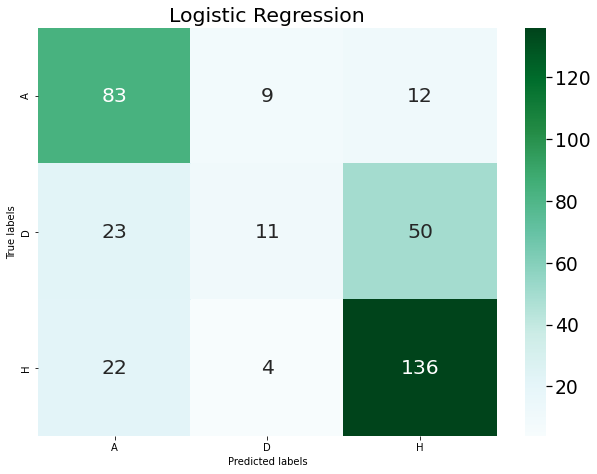

In [19]:
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=10, penalty='l2', random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nClassification Report: \n", report)
print("Train Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train))*100))
print("Test Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred)*100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuGn", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/LR.jpeg', dpi=300)

> ### **Random Forest**

>> #### **Hyperparameter Tuning**

In [20]:
# define the parameters to be tested
grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000], 
        'max_features': ['auto', 'sqrt'], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4]}

# apply grid search based on training data
model = RandomForestClassifier()
grid_search = GridSearchCV(model, grid, n_jobs=-1, scoring = 'f1_weighted')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

C:\Users\Christos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.58571743 0.5815224  0.58478218 0.58510599 0.58179074 0.58174717
 0.58453676 0.58573983 0.58495857 0.58150244 0.58007958 0.57844574
 0.58639266 0.57917164 0.58065385 0.57759055 0.58610865 0.5839029
 0.58337482 0.5797827  0.57671372 0.58349922 0.5818741  0.58200761
 0.58490488 0.57803257 0.58208373 0.57636824 0.57968015 0.57939323
 0.5786973  0.58362685 0.58557007 0.58159803 0.57643383 0.57955481
 0.57708544 0.57971655 0.57560938 0.58168699 0.57749625 0.57915542
 0.58093153 0.57285478 0.5726389  0.58071362 0.57695345 0.57461061
 0.57210717 0.5737159  0.5692495  0.5733654  0.57103359 0.57005252
 0.57479516 0.57724337 0.56477062 0.57738589 0.5744234  0.5694336
 0.57059618 0.56799057 0.57358572 0.5742542  0.57616332 0.57763647
 0.57226268 0.57389613 0.572494   0.57290801 0.57329448 0.57142339
 0.57773147 0.5766544  

Best hyperparameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.5869878061774648


Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.64      0.65       104
           1       0.50      0.13      0.21        84
           2       0.63      0.87      0.73       162

    accuracy                           0.63       350
   macro avg       0.59      0.55      0.53       350
weighted avg       0.60      0.63      0.58       350

Train Accuracy: 100.00 %
Test Accuracy: 62.57 %
MCC: 0.40 


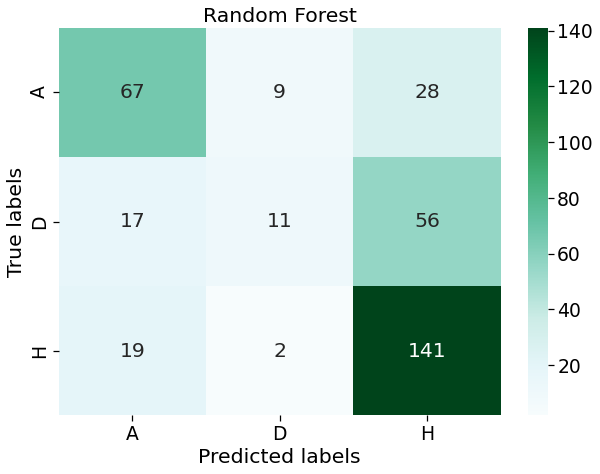

In [21]:
model = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Train Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train))*100))
print("Test Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred)*100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuGn", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Random Forest');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/RF.jpeg', dpi=300)

> ### **Support Vector Machines**

>> #### **Hyperparameter Tuning**

In [22]:
# define the parameters to be tested
grid = {'C': [0.01, 0.01, 0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# apply grid search based on training data
model = SVC()
grid_search = GridSearchCV(model, grid, n_jobs=-1, scoring = 'f1_weighted')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.6194288063628617


Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.72       104
           1       0.56      0.12      0.20        84
           2       0.68      0.88      0.77       162

    accuracy                           0.67       350
   macro avg       0.63      0.59      0.56       350
weighted avg       0.65      0.67      0.62       350

Train Accuracy: 67.43 %
Test Accuracy: 66.86 %
MCC: 0.48 


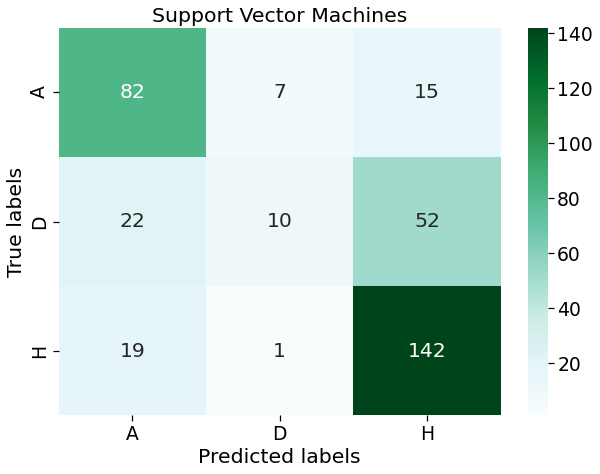

In [23]:
model=SVC(kernel='rbf', C=100, gamma=0.01, random_state=3) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Train Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train))*100))
print("Test Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred)*100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuGn", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Support Vector Machines');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/SVM.jpeg', dpi=300)

> ### **K-Nearest Neighbours**

>> #### **Hyperparameter Tuning**

In [24]:
# define the parameters to be tested
grid = {'leaf_size': [1, 2, 4, 8, 16],
        'n_neighbors': [2, 4, 8, 12, 16, 20, 24],
        'weights': ['uniform']}

# apply grid search based on training data
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, grid, n_jobs=-1, scoring = 'f1_weighted')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best hyperparameters: {'leaf_size': 1, 'n_neighbors': 16, 'weights': 'uniform'}
Best Score: 0.5629908908943826


Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.65      0.62       104
           1       0.28      0.11      0.16        84
           2       0.64      0.80      0.71       162

    accuracy                           0.59       350
   macro avg       0.50      0.52      0.49       350
weighted avg       0.54      0.59      0.55       350

Train Accuracy: 66.03 %
Test Accuracy: 58.86 %
MCC: 0.34 


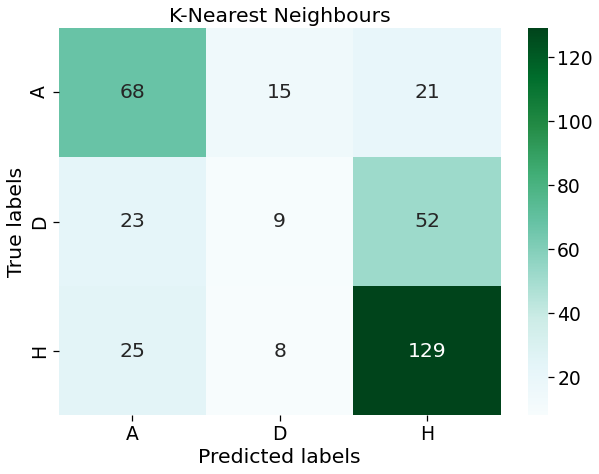

In [25]:
model = KNeighborsClassifier(leaf_size=1, n_neighbors=16, weights='uniform')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Train Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train))*100))
print("Test Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred)*100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuGn", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('K-Nearest Neighbours');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/KNN.jpeg', dpi=300)

> ### **XGBoost**

>> #### **Hyperparameter Tuning**

In [26]:
# define the parameters to be tested
grid = {'objective': ['multi:softmax'],
        'n_estimators': [10, 20, 40, 65, 100],
        'max_depth': [1, 2, 4, 6],
        'verbosity': [0],
        'use_label_encoder': [False]}

# apply grid search based on training data
model = XGBClassifier()
grid_search = GridSearchCV(model, grid, n_jobs=1, scoring = 'f1_weighted')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 100, 'objective': 'multi:softmax', 'use_label_encoder': False, 'verbosity': 0}
Best Score: 0.6018368248217063


Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       104
           1       0.38      0.07      0.12        84
           2       0.66      0.90      0.76       162

    accuracy                           0.65       350
   macro avg       0.57      0.57      0.53       350
weighted avg       0.60      0.65      0.59       350

Train Accuracy: 67.65 %
Test Accuracy: 65.14 %
MCC: 0.45 


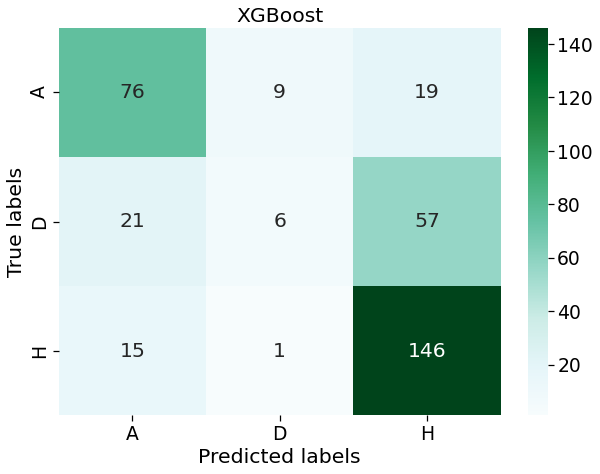

In [27]:
# Model performed better with max_depth = 1 on the test set
model = XGBClassifier(max_depth=1, n_estimators=100, objective='multi:softmax', use_label_encoder=False, verbosity = 0, seed=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)
print("Train Accuracy: %.2f %%" % (accuracy_score(y_train, model.predict(X_train))*100))
print("Test Accuracy: %.2f %%" % (accuracy_score(y_test, y_pred)*100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, y_pred)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuGn", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('XGBoost');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/XGBoost.jpeg', dpi=300)

> ### **Artificial Neural Network**

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       104
           1       0.44      0.18      0.25        84
           2       0.70      0.89      0.78       162

    accuracy                           0.68       350
   macro avg       0.62      0.61      0.59       350
weighted avg       0.65      0.68      0.65       350

Train Accuracy: 67.43 %
Test Accuracy: 68.29 %
MCC: 0.50 


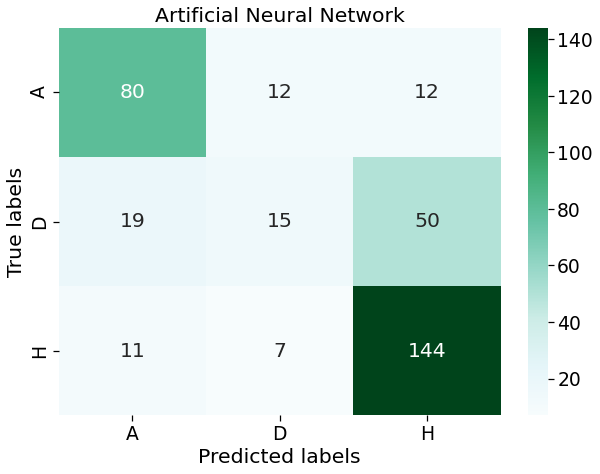

In [31]:
seed(7)
random.set_seed(7)

model = Sequential()
model.add(Dense(60, input_dim=42, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=60, batch_size=100, verbose=0)


y_pred = model.predict(X_test)
# transfrom predictions from 3-d vector to array
predictions = np.argmax(y_pred, axis=-1)

# Metrics
matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
print("Classification Report: \n", report)
print("Train Accuracy: %.2f %%" % (accuracy_score(y_train, np.argmax(model.predict(X_train), axis=-1))*100))
print("Test Accuracy: %.2f %%" % (accuracy_score(y_test, predictions)*100))
print("MCC: %.2f " % (matthews_corrcoef(y_test, predictions)))

# Plotting the confusion matrix
fig = plt.figure(figsize=(9, 7))
ax = plt.subplot()
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.8})
sns.heatmap(matrix, cmap="BuGn", annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Artificial Neural Network');
ax.xaxis.set_ticklabels(['A', 'D', 'H']); 
ax.yaxis.set_ticklabels(['A', 'D', 'H']);
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/Christos/Desktop/ANN.jpeg', dpi=300)

## **Exporting Predicted Result Labels**
---

In [35]:
# Result predictions of best model - ANN
predicted_results = pd.DataFrame(predictions)
predicted_results

,0
0,0
1,2
2,2
3,2
4,2
...,...
345,2
346,2
347,0
348,0


In [36]:
predicted_results.to_csv('C:/Users/Christos/Desktop/predicted_results.csv', index=False)